<a href="https://colab.research.google.com/github/ambg2040/AnaBarragan/blob/master/Graficos_articulo_05062025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

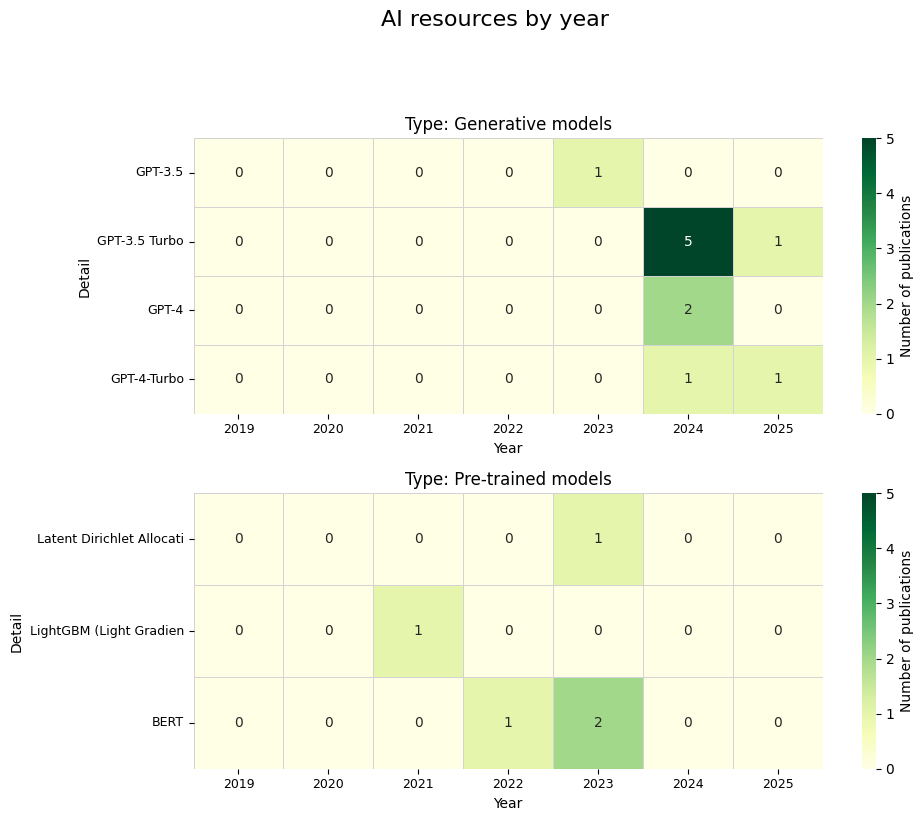

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from matplotlib.colors import Normalize

# --- Datos de la única tabla (corresponde a image_c9409f.png y image_c992fb.png) ---
# Se asume que estos son los únicos datos a usar para el heatmap.
data = """Type of AI resources	Detail	2019	2020	2021	2022	2023	2024	2025
Generative models	GPT-3.5	0	0	0	0	1	0	0
Generative models	GPT-3.5 Turbo	0	0	0	0	0	5	1
Generative models	GPT-4	0	0	0	0	0	2	0
Generative models	GPT-4-Turbo	0	0	0	0	0	1	1
Pre-trained models	Latent Dirichlet Allocati	0	0	0	0	1	0	0
Pre-trained models	LightGBM (Light Gradien	0	0	1	0	0	0	0
Pre-trained models	BERT	0	0	0	1	2	0	0
"""

# Cargar los datos en un DataFrame
df = pd.read_csv(StringIO(data), sep="\t")

# Identificar las columnas de los años
years = [col for col in df.columns if str(col).isdigit()]

# Eliminar filas (detalles de recursos) que son completamente cero en todos los años
# Esto es opcional, pero ayuda a limpiar el gráfico si hay muchas filas vacías.
df_filtered = df.loc[(df[years] != 0).any(axis=1)].copy() # Use .copy() to avoid SettingWithCopyWarning

# Obtener los tipos únicos de recursos de IA para faceting
unique_types = df_filtered['Type of AI resources'].unique()

# --- Unificar la escala de color ---
# Calcular el valor mínimo y máximo global a través de todas las columnas de años
global_min_value = df_filtered[years].values.min()
global_max_value = df_filtered[years].values.max()

# Crear una normalización para el colormap basada en los valores globales
# Usamos vmin y vmax para asegurar que la escala de color se aplique consistentemente
norm = Normalize(vmin=global_min_value, vmax=global_max_value)

# Determinar el número de filas y columnas para los subplots
n_types = len(unique_types)
n_cols = 1
n_rows = n_types

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10 * n_cols, 4 * n_rows), squeeze=False)
axes = axes.flatten()

# Título general de la figura
fig.suptitle("AI resources by year", fontsize=16, y=1.02)


for i, ai_type in enumerate(unique_types):
    ax = axes[i]

    # Filtrar los datos para el tipo de IA actual
    df_subset = df_filtered[df_filtered['Type of AI resources'] == ai_type].copy()

    # Eliminar la columna 'Type of AI resources' antes de graficar el heatmap,
    # y establecer 'Detail' como índice para que sea el eje Y.
    df_heatmap_data = df_subset.drop(columns=['Type of AI resources']).set_index('Detail')

    # Crear el heatmap para el subplot actual
    # IMPORTANT: Pass vmin and vmax to sns.heatmap to unify the color scale
    sns.heatmap(
        df_heatmap_data,
        ax=ax,
        cmap="YlGn",
        annot=True,
        fmt="d",
        linewidths=0.7,
        linecolor='lightgrey',
        cbar_kws={'label': 'Number of publications'},
        vmin=global_min_value, # Set the minimum value for the color map
        vmax=global_max_value  # Set the maximum value for the color map
    )

    ax.set_title(f'Type: {ai_type}', fontsize=12)
    ax.set_xlabel("Year", fontsize=10)
    ax.set_ylabel("Detail", fontsize=10)

    ax.tick_params(axis='x', rotation=0, labelsize=9)
    ax.tick_params(axis='y', rotation=0, labelsize=9)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

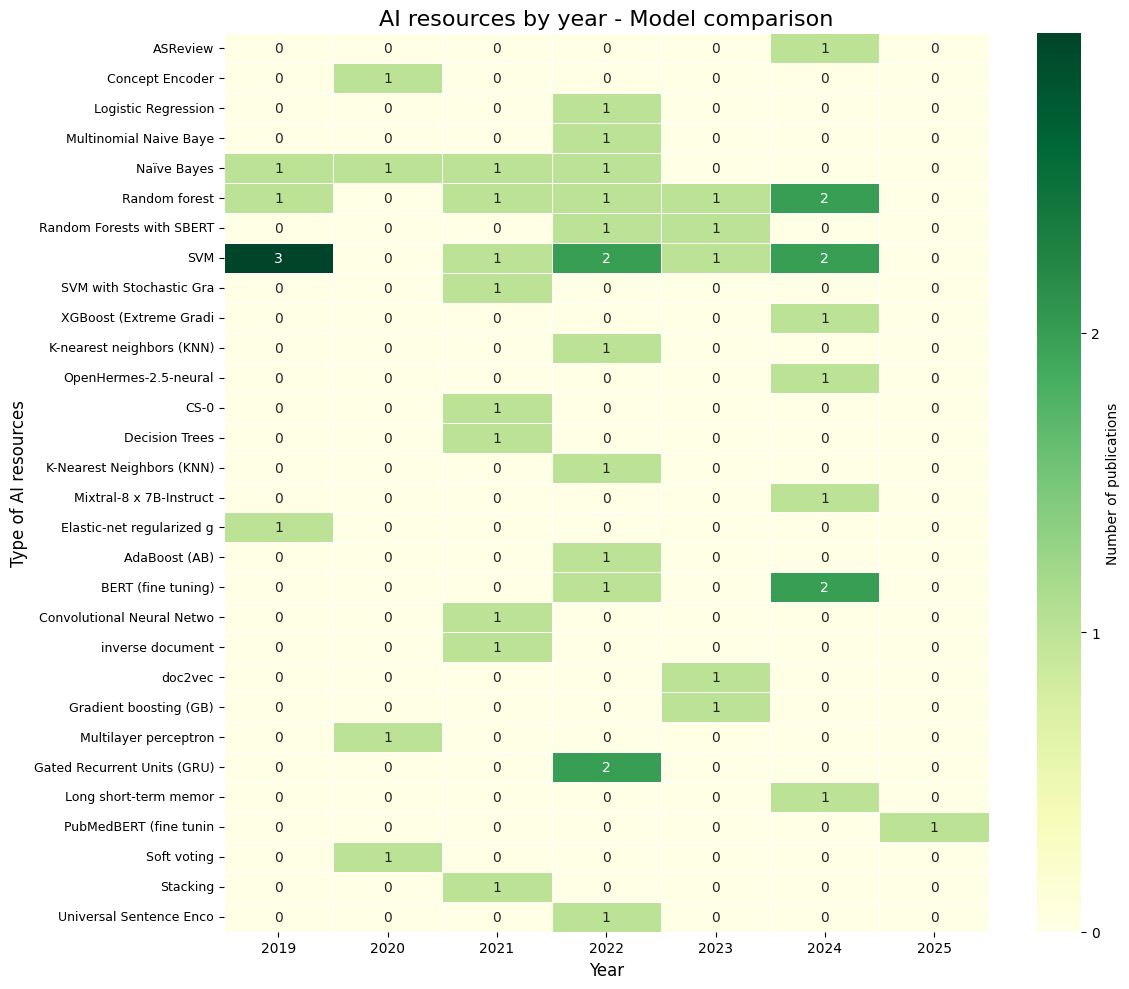

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Datos proporcionados como una cadena
data = """AI resources - Model comparison	2019	2020	2021	2022	2023	2024	2025
ASReview	0	0	0	0	0	1	0
Concept Encoder	0	1	0	0	0	0	0
FlanT5-XXL (FlanT5)	0	0	0	0	0	0	0
Logistic Regression	0	0	0	1	0	0	0
Multinomial Naive Baye	0	0	0	1	0	0	0
Naïve Bayes	1	1	1	1	0	0	0
Random forest	1	0	1	1	1	2	0
Random Forests with SBERT	0	0	0	1	1	0	0
SVM	3	0	1	2	1	2	0
SVM with Stochastic Gra	0	0	1	0	0	0	0
XGBoost (Extreme Gradi	0	0	0	0	0	1	0
K-nearest neighbors (KNN)	0	0	0	1	0	0	0
L2-Logistic regression	0	0	0	0	0	0	0
Logistic Regression	0	0	0	0	0	0	0
Logistic Regression with elastic net regularization (LogReg)	0	0	0	0	0	0	0
OpenHermes-2.5-neural	0	0	0	0	0	1	0
CS-0	0	0	1	0	0	0	0
Decision Trees	0	0	1	0	0	0	0
K-Nearest Neighbors (KNN)	0	0	0	1	0	0	0
Logistic Regression	0	0	0	0	0	0	0
Mixtral-8 x 7B-Instruct	0	0	0	0	0	1	0
Simple Dense Neural Network	0	0	0	0	0	0	0
Elastic-net regularized g	1	0	0	0	0	0	0
Long Short Term Memory (LSTM)	0	0	0	0	0	0	0
Platypus2-70B-Instruct	0	0	0	0	0	0	0
Sigmoidal SVM.	0	0	0	0	0	0	0
AdaBoost (AB)	0	0	0	1	0	0	0
BERT (fine tuning)	0	0	0	1	0	2	0
Convolutional Neural Netwo	0	0	1	0	0	0	0
inverse document	0	0	1	0	0	0	0
doc2vec	0	0	0	0	1	0	0
Gradient boosting (GB)	0	0	0	0	1	0	0
Multilayer perceptron	0	1	0	0	0	0	0
Universal Sentence Encoder (USE)	0	0	0	0	0	0	0
Gated Recurrent Units (GRU)	0	0	0	2	0	0	0
Long short-term memor	0	0	0	0	0	1	0
PubMedBERT (fine tunin	0	0	0	0	0	0	1
Bidirectional LSTM	0	0	0	0	0	0	0
Soft voting	0	1	0	0	0	0	0
Stacking	0	0	1	0	0	0	0
Universal Sentence Enco	0	0	0	1	0	0	0
"""

# Cargar los datos en un DataFrame
df = pd.read_csv(StringIO(data), sep="\t")

# Establecer la primera columna como índice
df.set_index("AI resources - Model comparison", inplace=True)

# Opcional: Eliminar filas (tipos de recursos) que son completamente cero en todos los años
# Esto puede hacer el heatmap más legible si hay muchas filas vacías.
df_filtered = df[(df.sum(axis=1) > 0)]

# Crear el heatmap
plt.figure(figsize=(12, 10)) # Ajusta el tamaño de la figura según tus necesidades

# Usar sns.heatmap para crear el gráfico
# cmap="YlGn" genera un colormap de amarillo a verde (Yellow-Green)
# annot=True muestra los valores numéricos en las celdas
# fmt="d" formatea los números como enteros
# linewidths=0.5 añade líneas blancas entre las celdas para mayor claridad
# cbar_kws={'label': 'Número de Recursos'} personaliza la etiqueta de la barra de color
sns.heatmap(df_filtered, cmap="YlGn", annot=True, fmt="d", linewidths=0.5,
            cbar_kws={'label': 'Number of publications', 'ticks': integer_ticks})

plt.title("AI resources by year - Model comparison", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Type of AI resources", fontsize=12)

# Ajustar las etiquetas del eje Y para que sean legibles si son muy largas
plt.yticks(rotation=0, fontsize=9)
plt.xticks(fontsize=10)

plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para que quepan en la figura
plt.show()

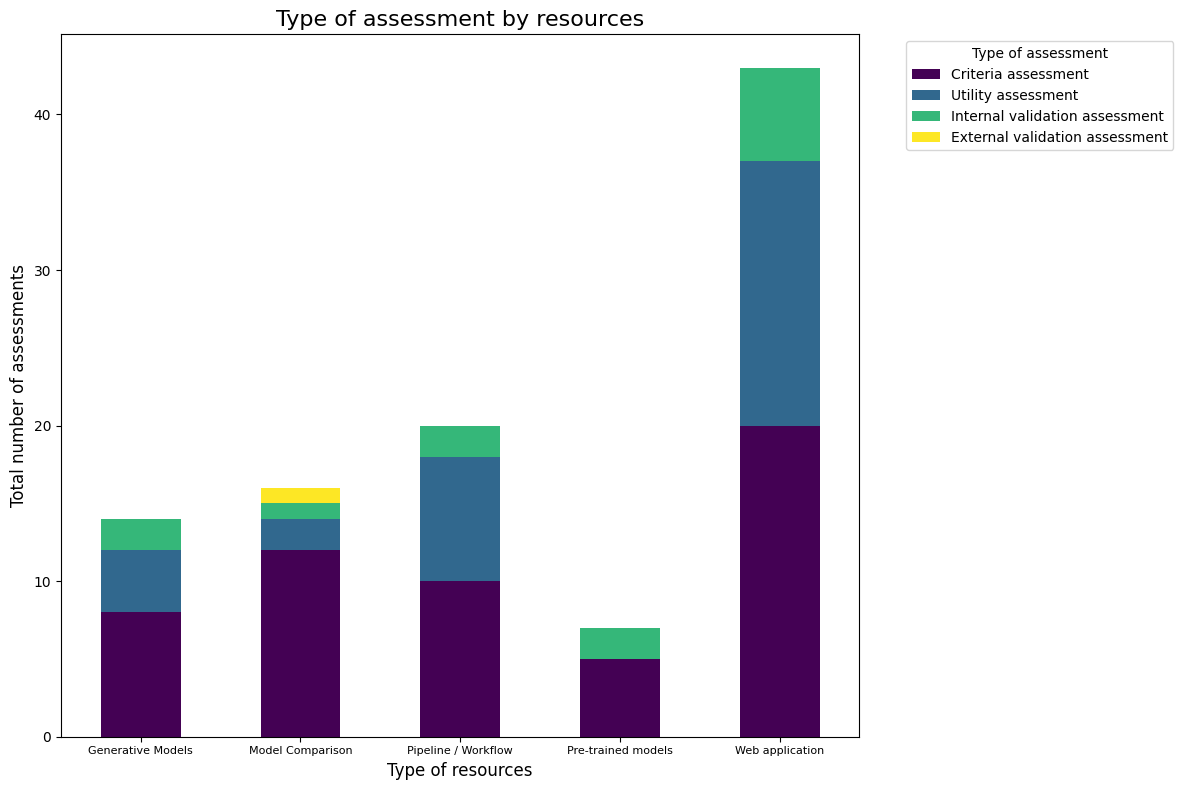

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# --- Datos de la tabla de Evaluaciones ---
data_assessments = """Resource category\tCriteria assessment\tUtility assessment\tInternal validation assessment\tExternal validation assessment
Web application\t1\t0\t1\t0
Pre-trained models\t1\t0\t0\t0
Model Comparison\t1\t0\t0\t0
Model Comparison\t1\t0\t0\t1
Web application\t1\t1\t0\t0
Pipeline / Workflow\t1\t1\t0\t0
Pre-trained models\t1\t0\t1\t0
Web application\t0\t1\t0\t0
Pipeline / Workflow\t1\t1\t0\t0
Web application\t1\t0\t1\t0
Model Comparison\t1\t0\t0\t0
Pipeline / Workflow\t1\t0\t1\t0
Pipeline / Workflow\t1\t0\t0\t0
Pipeline / Workflow\t0\t1\t0\t0
Pipeline / Workflow\t1\t0\t0\t0
Web application\t0\t1\t0\t0
Pre-trained models\t1\t0\t0\t0
Web application\t0\t1\t0\t0
Web application\t0\t1\t0\t0
Model Comparison\t1\t0\t0\t0
Web application\t0\t1\t0\t0
Pre-trained models\t1\t0\t0\t0
Web application\t0\t1\t0\t0
Model Comparison\t1\t0\t1\t0
Pipeline / Workflow\t0\t1\t0\t0
Generative Models\t1\t1\t0\t0
Web application\t1\t0\t0\t0
Pre-trained models\t1\t0\t1\t0
Model Comparison\t1\t1\t0\t0
Model Comparison\t1\t0\t0\t0
Web application\t1\t1\t0\t0
Pipeline / Workflow\t1\t0\t1\t0
Web application\t1\t1\t0\t0
Pipeline / Workflow\t1\t1\t0\t0
Web application\t0\t1\t0\t0
Web application\t1\t0\t0\t0
Web application\t1\t1\t0\t0
Web application\t1\t0\t0\t0
Web application\t1\t1\t0\t0
Web application\t1\t0\t0\t0
Generative Models\t1\t0\t1\t0
Web application\t1\t0\t1\t0
Web application\t0\t1\t0\t0
Web application\t1\t0\t0\t0
Generative Models\t1\t1\t0\t0
Pipeline / Workflow\t1\t1\t0\t0
Model Comparison\t1\t1\t0\t0
Generative Models\t1\t0\t0\t0
Web application\t1\t0\t1\t0
Model Comparison\t1\t0\t0\t0
Pipeline / Workflow\t1\t1\t0\t0
Web application\t1\t1\t0\t0
Web application\t1\t0\t1\t0
Model Comparison\t1\t0\t0\t0
Web application\t1\t0\t1\t0
Pipeline / Workflow\t1\t1\t0\t0
Model Comparison\t1\t0\t0\t0
Generative Models\t1\t0\t1\t0
Web application\t1\t0\t0\t0
Web application\t1\t1\t0\t0
Model Comparison\t1\t0\t0\t0
Web application\t1\t0\t0\t0
Generative Models\t1\t1\t0\t0
Web application\t0\t1\t0\t0
Generative Models\t1\t1\t0\t0
Generative Models\t1\t0\t0\t0
Web application\t0\t1\t0\t0
"""

# Cargar los datos de evaluaciones desde la cadena de texto
df_assessments = pd.read_csv(StringIO(data_assessments), sep="\t")

# Columnas de evaluación: Asegúrate de que los nombres de las columnas son correctos
assessment_cols = ['Criteria assessment', 'Utility assessment', 'Internal validation assessment', 'External validation assessment']

# Agrupar los datos por la columna 'Resource category' y sumar los valores para cada tipo de evaluación.
df_grouped_assessments = df_assessments.groupby('Resource category')[assessment_cols].sum()

# Crear el gráfico de barras apiladas
# Transponemos el DataFrame agrupado (.T) para que las categorías de recursos sean las columnas
# y los tipos de evaluación sean las filas. Esto es necesario para que Matplotlib/Pandas
# apile los tipos de evaluación para cada categoría de recurso.
# Para usar un colormap de azul oscuro a verde, podemos usar 'PuBuGn' o crear uno personalizado.
# 'PuBuGn' va de púrpura a azul a verde, lo cual podría funcionar.
# Si queremos solo de azul oscuro a verde, podemos usar 'GnBu' invertido o seleccionar puntos específicos.
# Let's try 'GnBu_r' which goes from green to blue (so blue to green when reversed).
ax = df_grouped_assessments.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='viridis')

# Añadir títulos y etiquetas
plt.title('Type of assessment by resources', fontsize=16)
plt.xlabel('Type of resources', fontsize=12)
plt.ylabel('Total number of assessments', fontsize=12)

# Rotar las etiquetas del eje X para que sean legibles
plt.xticks(rotation=0, ha='center', fontsize=8)

# Añadir una leyenda para identificar los colores de las pilas
plt.legend(title='Type of assessment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el diseño para evitar que la leyenda se superponga con el gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()

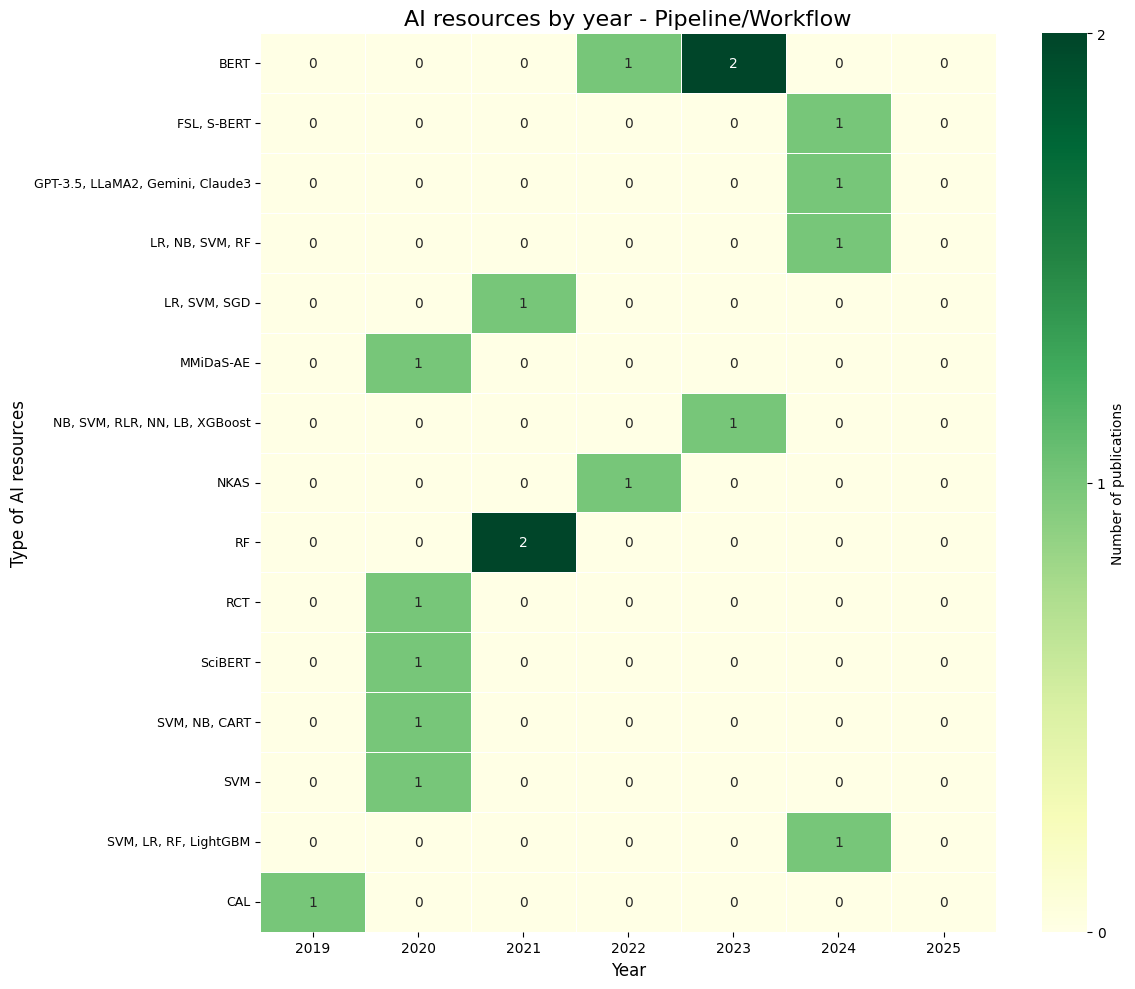

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Datos proporcionados como una cadena
data = """AI_resources\t2019\t2020\t2021\t2022\t2023\t2024\t2025
BERT\t0\t0\t0\t1\t2\t0\t0
FSL, S-BERT\t0\t0\t0\t0\t0\t1\t0
GPT-3.5, LLaMA2, Gemini, Claude3\t0\t0\t0\t0\t0\t1\t0
LR, NB, SVM, RF\t0\t0\t0\t0\t0\t1\t0
LR, SVM, SGD\t0\t0\t1\t0\t0\t0\t0
MMiDaS-AE\t0\t1\t0\t0\t0\t0\t0
NB, SVM, RLR, NN, LB, XGBoost\t0\t0\t0\t0\t1\t0\t0
NKAS\t0\t0\t0\t1\t0\t0\t0
RF\t0\t0\t2\t0\t0\t0\t0
RCT\t0\t1\t0\t0\t0\t0\t0
SciBERT\t0\t1\t0\t0\t0\t0\t0
SVM, NB, CART\t0\t1\t0\t0\t0\t0\t0
SVM\t0\t1\t0\t0\t0\t0\t0
SVM, LR, RF, LightGBM\t0\t0\t0\t0\t0\t1\t0
CAL\t1\t0\t0\t0\t0\t0\t0
"""

# Cargar los datos en un DataFrame
df = pd.read_csv(StringIO(data), sep="\t")

# Establecer la primera columna como índice
# The first column name in the modified data is 'AI_resources'
df.set_index("AI_resources", inplace=True)

# Opcional: Eliminar filas (tipos de recursos) que son completamente cero en todos los años
# Esto puede hacer el heatmap más legible si hay muchas filas vacías.
# The numeric columns start from the second column after setting the index, so sum all columns
df_filtered = df[(df.sum(axis=1) > 0)].copy() # Added .copy() for good practice

# Calculate min and max values for color bar ticks
min_val = df_filtered.values.min()
max_val = df_filtered.values.max()

# Generate a list of integers between min and the maximum of actual max_val and 3 (inclusive)
# This ensures that 3 is included in the ticks if the data's max is less than 3.
integer_ticks = list(range(int(min_val), max(int(max_val), 3) + 1))

# Crear el heatmap
plt.figure(figsize=(12, 10)) # Ajusta el tamaño de la figura según tus necesidades

# Usar sns.heatmap para crear el gráfico
# Use df_filtered directly after dropping zero-sum rows
sns.heatmap(df_filtered, cmap="YlGn", annot=True, fmt="d", linewidths=0.5,
            cbar_kws={'label': 'Number of publications', 'ticks': integer_ticks})

plt.title("AI resources by year - Pipeline/Workflow", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Type of AI resources", fontsize=12)

# Ajustar las etiquetas del eje Y para que sean legibles si son muy largas
plt.yticks(rotation=0, fontsize=9)
plt.xticks(fontsize=10)

plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para que quepan en la figura
plt.show()

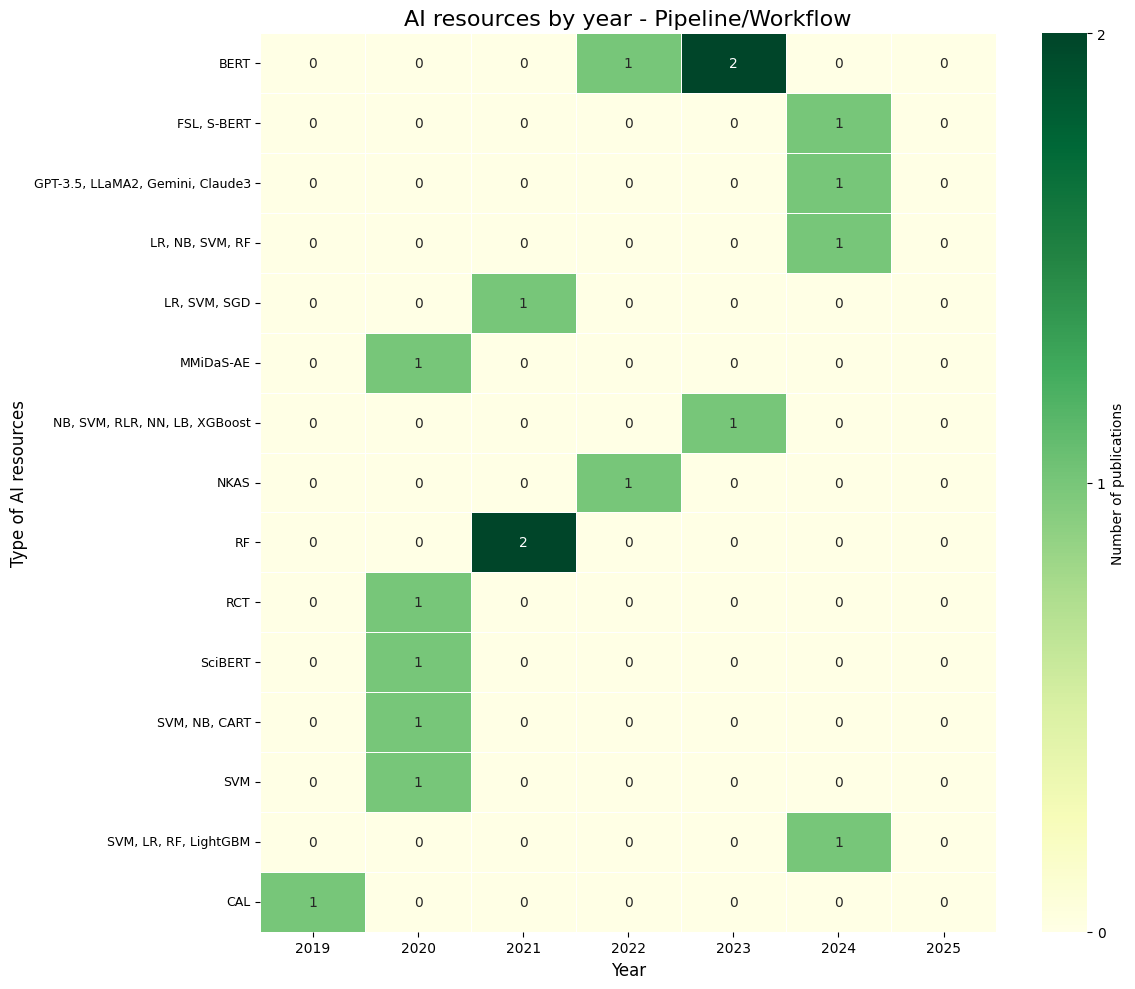

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Datos proporcionados como una cadena
data = """AI_resources\t2019\t2020\t2021\t2022\t2023\t2024\t2025
BERT\t0\t0\t0\t1\t2\t0\t0
FSL, S-BERT\t0\t0\t0\t0\t0\t1\t0
GPT-3.5, LLaMA2, Gemini, Claude3\t0\t0\t0\t0\t0\t1\t0
LR, NB, SVM, RF\t0\t0\t0\t0\t0\t1\t0
LR, SVM, SGD\t0\t0\t1\t0\t0\t0\t0
MMiDaS-AE\t0\t1\t0\t0\t0\t0\t0
NB, SVM, RLR, NN, LB, XGBoost\t0\t0\t0\t0\t1\t0\t0
NKAS\t0\t0\t0\t1\t0\t0\t0
RF\t0\t0\t2\t0\t0\t0\t0
RCT\t0\t1\t0\t0\t0\t0\t0
SciBERT\t0\t1\t0\t0\t0\t0\t0
SVM, NB, CART\t0\t1\t0\t0\t0\t0\t0
SVM\t0\t1\t0\t0\t0\t0\t0
SVM, LR, RF, LightGBM\t0\t0\t0\t0\t0\t1\t0
CAL\t1\t0\t0\t0\t0\t0\t0
"""

# Cargar los datos en un DataFrame
df = pd.read_csv(StringIO(data), sep="\t")

# Establecer la primera columna como índice
# The first column name in the modified data is 'AI_resources'
df.set_index("AI_resources", inplace=True)

# Opcional: Eliminar filas (tipos de recursos) que son completamente cero en todos los años
# Esto puede hacer el heatmap más legible si hay muchas filas vacías.
# The numeric columns start from the second column after setting the index, so sum all columns
df_filtered = df[(df.sum(axis=1) > 0)].copy() # Added .copy() for good practice

# Calculate min and max values for color bar ticks
min_val = df_filtered.values.min()
max_val = df_filtered.values.max()

# Generate a list of integers between min and max (inclusive)
integer_ticks = list(range(int(min_val), int(max_val) + 1))

# Crear el heatmap
plt.figure(figsize=(12, 10)) # Ajusta el tamaño de la figura según tus necesidades

# Usar sns.heatmap para crear el gráfico
# Use df_filtered directly after dropping zero-sum rows
sns.heatmap(df_filtered, cmap="YlGn", annot=True, fmt="d", linewidths=0.5,
            cbar_kws={'label': 'Number of publications', 'ticks': integer_ticks})

plt.title("AI resources by year - Pipeline/Workflow", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Type of AI resources", fontsize=12)

# Ajustar las etiquetas del eje Y para que sean legibles si son muy largas
plt.yticks(rotation=0, fontsize=9)
plt.xticks(fontsize=10)

plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para que quepan en la figura
plt.show()

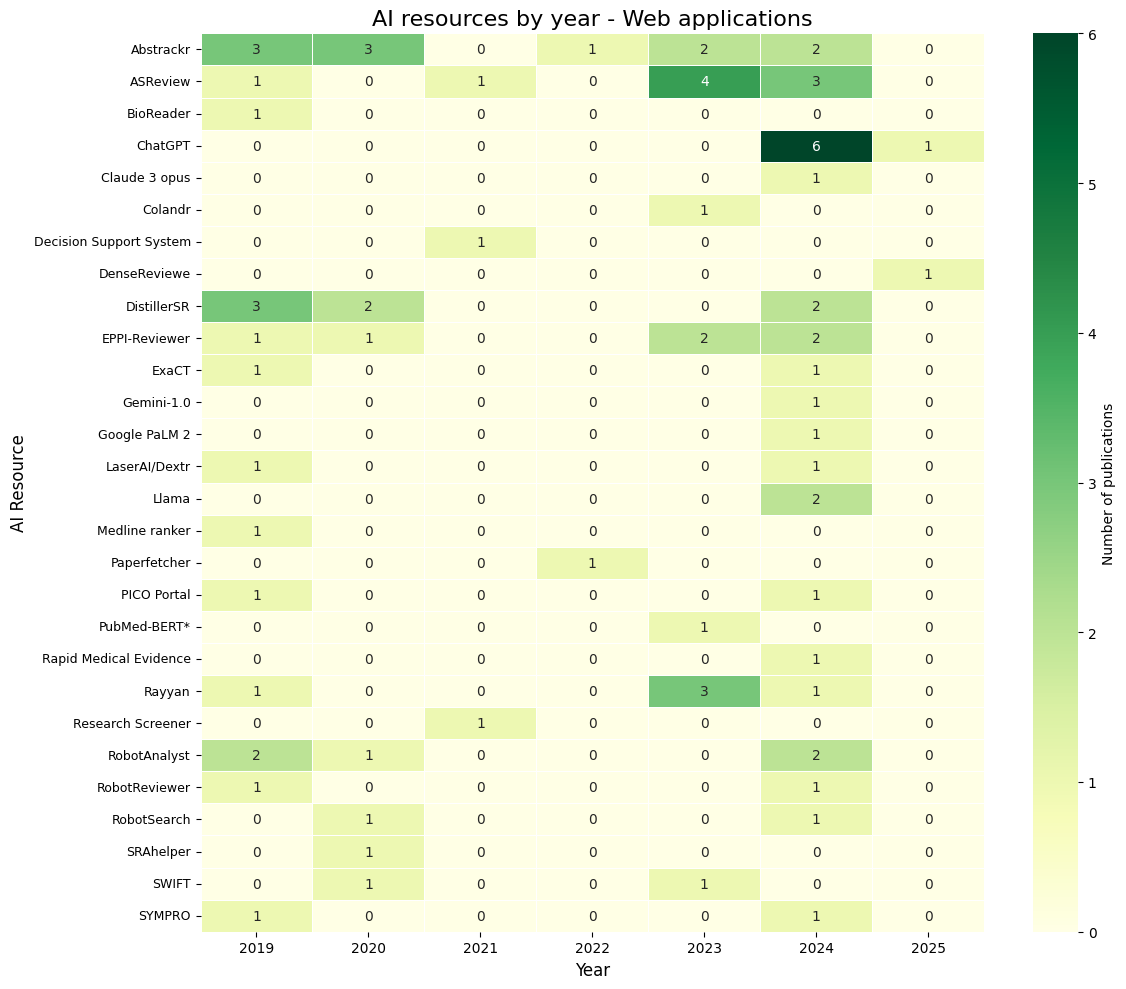

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Datos proporcionados como una cadena
data = """AI resources - Web applications	2019	2020	2021	2022	2023	2024	2025
Abstrackr	3	3	0	1	2	2	0
ASReview	1	0	1	0	4	3	0
BioReader	1	0	0	0	0	0	0
ChatGPT	0	0	0	0	0	6	1
Claude 3 opus	0	0	0	0	0	1	0
Colandr	0	0	0	0	1	0	0
Decision Support System	0	0	1	0	0	0	0
DenseReviewe	0	0	0	0	0	0	1
DistillerSR	3	2	0	0	0	2	0
EPPI-Reviewer	1	1	0	0	2	2	0
ExaCT	1	0	0	0	0	1	0
Gemini-1.0	0	0	0	0	0	1	0
Google PaLM 2	0	0	0	0	0	1	0
LaserAI/Dextr	1	0	0	0	0	1	0
Llama	0	0	0	0	0	2	0
Medline ranker	1	0	0	0	0	0	0
Paperfetcher	0	0	0	1	0	0	0
PICO Portal	1	0	0	0	0	1	0
PubMed-BERT*	0	0	0	0	1	0	0
Rapid Medical Evidence	0	0	0	0	0	1	0
Rayyan	1	0	0	0	3	1	0
Research Screener	0	0	1	0	0	0	0
RobotAnalyst	2	1	0	0	0	2	0
RobotReviewer	1	0	0	0	0	1	0
RobotSearch	0	1	0	0	0	1	0
SRAhelper	0	1	0	0	0	0	0
SWIFT	0	1	0	0	1	0	0
SYMPRO	1	0	0	0	0	1	0
"""

# Cargar los datos en un DataFrame
# Use '\t' as the separator if the header and data rows are consistently tab-separated.
# If there's a mix or multiple spaces, using sep='\s+' might be necessary,
# but based on the error and the string, a single tab after the first column name seems likely.
# If issues persist with '\t', try sep='\s+' or sep=r'\t| '
df = pd.read_csv(StringIO(data), sep="\t")

# The correct column name is now the first one.
# Set the first column as index using its actual name or index position [0].
# Using index position [0] is safer if the exact string name changes.
df.set_index(df.columns[0], inplace=True)

# You might want to rename the index for clarity if the original column name is long
df.index.name = "AI Resource"


# Opcional: Eliminar filas (tipos de recursos) que son completamente cero en todos los años
# Esto puede hacer el heatmap más legible si hay muchas filas vacías.
# Exclude the index column from the sum check
df_filtered = df[(df.sum(axis=1) > 0)]

# Crear el heatmap
plt.figure(figsize=(12, 10)) # Ajusta el tamaño de la figura según tus necesidades

# Usar sns.heatmap para crear el gráfico
# cmap="YlGn" genera un colormap de amarillo a verde (Yellow-Green)
# annot=True muestra los valores numéricos en las celdas
# fmt="d" formatea los números como enteros
# linewidths=0.5 añade líneas blancas entre las celdas para mayor claridad
# cbar_kws={'label': 'Número de Recursos'} personaliza la etiqueta de la barra de color
sns.heatmap(df_filtered, cmap="YlGn", annot=True, fmt="d", linewidths=0.5, cbar_kws={'label': 'Number of publications'})

plt.title("AI resources by year - Web applications", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("AI Resource", fontsize=12) # Updated ylabel to match the new index name

# Ajustar las etiquetas del eje Y para que sean legibles si son muy largas
plt.yticks(rotation=0, fontsize=9)
plt.xticks(fontsize=10)

plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para que quepan en la figura
plt.show()